## Контест 1

Выполнил: Шамбилов Руслан

1. Загрузим библиотеки

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

2. Загрузим датасеты, сразу очистим их от дубликатов и пустых значений

In [45]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train = df_train.dropna().drop_duplicates()
df_test = df_test.dropna().drop_duplicates()

3. Визуализация распределение признака RiskScore, отловим выбросы

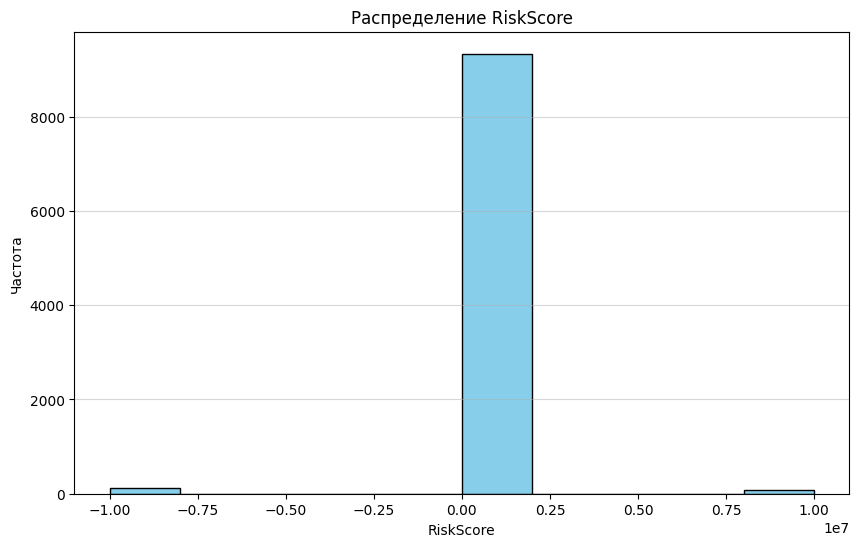

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['RiskScore'], bins=10, color='skyblue', edgecolor='black')
plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.5)
plt.show()

4. Уберем все выбросы, визуализируем уже без них (значения <0 и >100 являются выбросами)

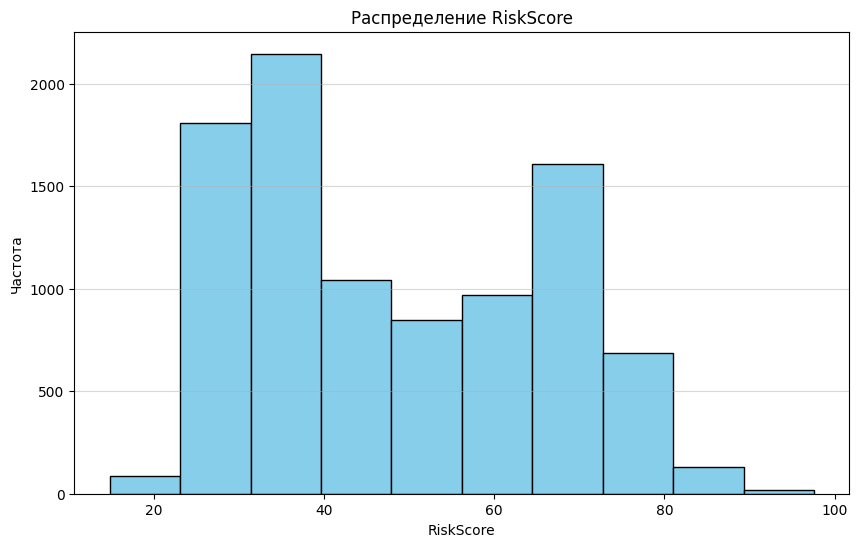

In [48]:
df_train = df_train[(df_train['RiskScore'] >= 0) & (df_train['RiskScore'] <= 100)]
plt.figure(figsize=(10, 6))
plt.hist(df_train['RiskScore'], bins=10, color='skyblue', edgecolor='black')
plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.5)
plt.show()

5. Обучим модель линейной регрессии

In [55]:
x = df_train.loc[:, df_train.columns != 'RiskScore']
y = df_train['RiskScore']

x_train, x_test, y_train, y_test = train_test_split(x, y)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 20.446156555106395
R-squared (R²): 0.931060550491819


6. Опробуем модель на тестовом наборе данных, выведем итоговый .csv файл

In [61]:
x_test = df_test.drop(columns=['ID'])

y_test_pred = model.predict(x_test)

df_result = pd.DataFrame({
    'ID': df_test['ID'],  
    'RiskScore': y_test_pred  
})

df_result.to_csv('contest.csv', index=False)
